In [22]:
## Basic
import pandas as pd
import numpy as np

## Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() #setting sns for default plots

## models
from sklearn.linear_model import LogisticRegression

In [2]:
!pwd

/Users/anuja/Anuja/IdeaProjects/Kaggle/P1_TitanicMLFromDisaster/JupyterNotebooks/Self


## 1. Loading Data

In [9]:
## train data
train = pd.read_csv('/Users/anuja/Anuja/IdeaProjects/Kaggle/P1_TitanicMLFromDisaster/Data/train.csv')
## test data
test = pd.read_csv('/Users/anuja/Anuja/IdeaProjects/Kaggle/P1_TitanicMLFromDisaster/Data/test.csv')

## 2. Exploratory Data Analysis

In [10]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Data Dictionary
* Survived: 0=No, 1=Yes
* pClass: Ticket class: 1,2,3
* sibsp: # of siblings/spouses aboard
* parch: # of parents/children aboard
* ticket: Ticket Number
* cabin: Cabin Number
* embarked: Port of embarkation = C,Q,S

In [13]:
print("train :",train.shape)
print("test :",test.shape)

train : (891, 12)
test : (418, 11)


### 2.1 Checking null values

In [16]:
train.info()

## Here we see that there is missing data in Age and Cabin

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
test.info()

## Here also we see that there is missing data in Age and Cabin

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [20]:
## Another way to check for null values is :
train.isnull().sum()

## This shows that Age has 177 null values while Cabin has 687 null values.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
## Checking same with test
test.isnull().sum()

## This shows that Age has 86 null values while Cabin has 327 null values.

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### 2.2 Visualizing the data

In order to visualize the data we will use the libraries imported above

#### 2.2.1 Plotting Bar chart for analysis for Categorical Features

Categorical columns in the data are
* pClass
* Sex
* sibSp
* parch
* Embarked
* Cabin

In [32]:
## defining a function to create bar chart for the given feature 
## (Note: bar chart will be plotted for one feature at a time hence we are using function with input as feature)

def bar_chart(feature):
    survived = train[train['Survived'] == 1][feature].value_counts() ## for the given feature : calculating #survived
    dead = train[train['Survived'] == 0][feature].value_counts()     ## for the given feature : calculate #dead
    df = pd.DataFrame([survived,dead])                               ## creating dataFrame with all the survived values
    df.index = ['Survived','Dead']                                   ## creating index for the dataFrame
    df.plot(kind='bar',stacked=True, figsize=(10,5))                ## plotting bar chart (stacked)

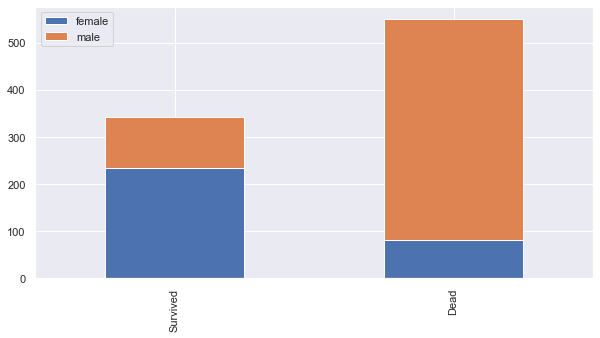

In [42]:
bar_chart('Sex')
## More no of women survived hence, women are more likely to survive than men

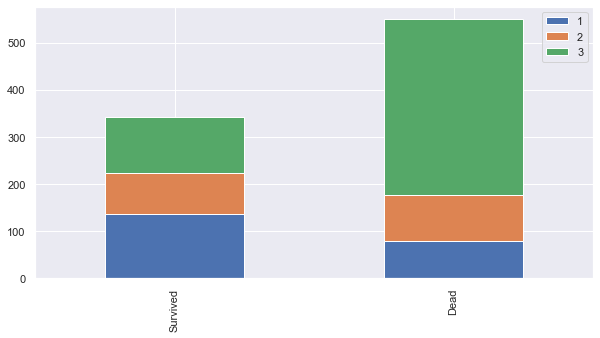

In [43]:
bar_chart('Pclass')
## People from 1st class more likely to survive than other classes
## People from 3rd class more likely dead than other class

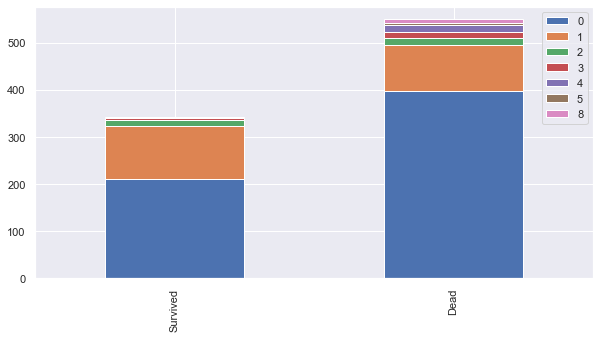

In [44]:
bar_chart('SibSp')
## Person aboarded without sibling or spouse (Value 0) are more likely dead
## Person aboarded with more than 2 siblings or spouse more likely survived

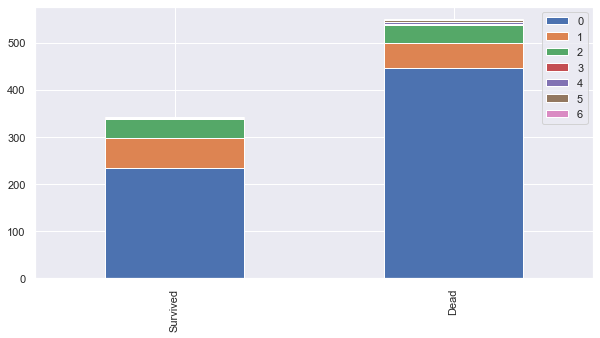

In [45]:
bar_chart('Parch')
## Person aboarded alone more likely dead
## Person with more than two parents or children more likely to survive

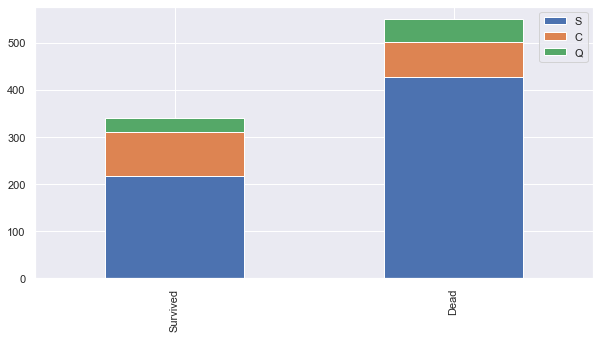

In [47]:
bar_chart('Embarked')
## Person Embarked from S port : more likely dead
## Person Embarked from Q port : more likely dead
## Person Embarked from C port : more likely survied

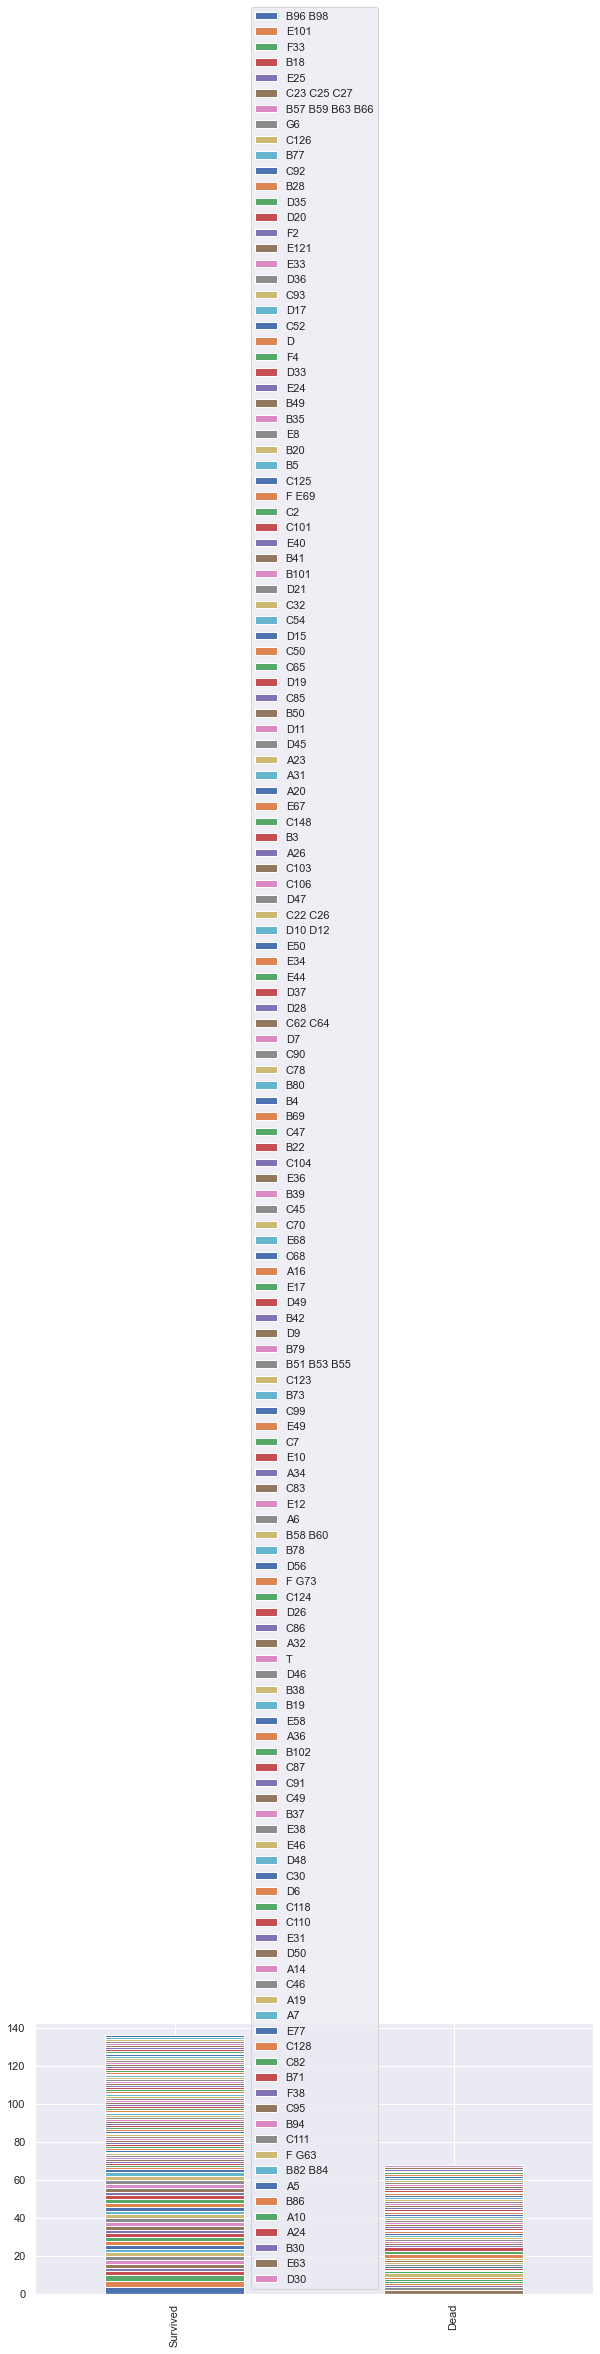

In [48]:
bar_chart('Cabin')
## Can't conclude anything from here

## 3. Feature Engineering

Feature Engineering is the process of using domain knowledge of the data 
to create features(feature vectors) that make ML models work


In [55]:
## Deleting unnecessary column
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)